In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
data=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")

In [265]:
data.shape


(1460, 81)

In [266]:
test_data.shape

(1459, 80)

In [267]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [268]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [269]:
def get_features_with_na(data):
  features_with_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]
  for f in features_with_na:
    print(f," ", np.round(data[f].isnull().mean(),4),"% missing values")
  return features_with_na

features_with_na=get_features_with_na(data)
test_features_with_na=get_features_with_na(test_data)

LotFrontage   0.1774 % missing values
Alley   0.9377 % missing values
MasVnrType   0.0055 % missing values
MasVnrArea   0.0055 % missing values
BsmtQual   0.0253 % missing values
BsmtCond   0.0253 % missing values
BsmtExposure   0.026 % missing values
BsmtFinType1   0.0253 % missing values
BsmtFinType2   0.026 % missing values
FireplaceQu   0.4726 % missing values
GarageType   0.0555 % missing values
GarageYrBlt   0.0555 % missing values
GarageFinish   0.0555 % missing values
GarageQual   0.0555 % missing values
GarageCond   0.0555 % missing values
PoolQC   0.9952 % missing values
Fence   0.8075 % missing values
MiscFeature   0.963 % missing values
MSZoning   0.0027 % missing values
LotFrontage   0.1556 % missing values
Alley   0.9267 % missing values
Utilities   0.0014 % missing values
MasVnrType   0.011 % missing values
MasVnrArea   0.0103 % missing values
BsmtQual   0.0302 % missing values
BsmtCond   0.0308 % missing values
BsmtExposure   0.0302 % missing values
BsmtFinType1   0.028

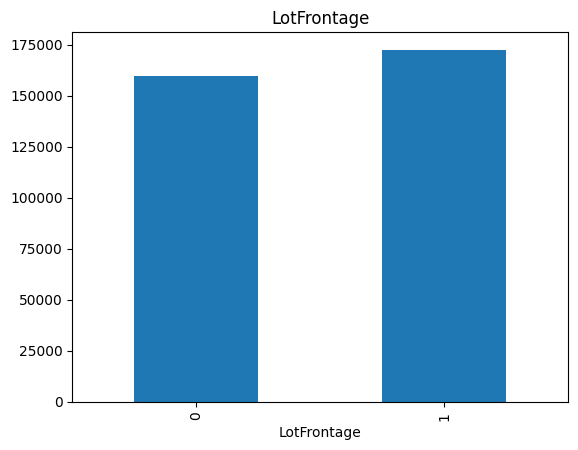

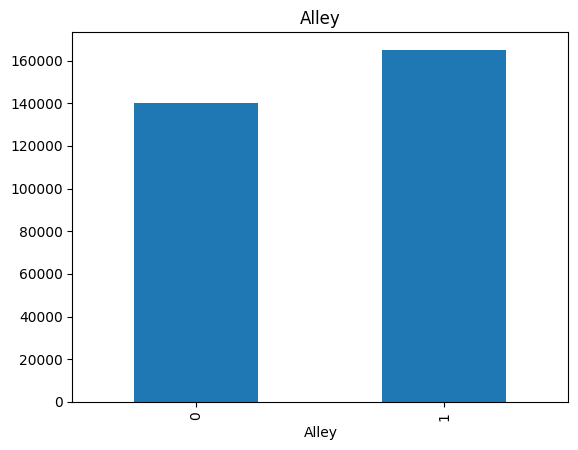

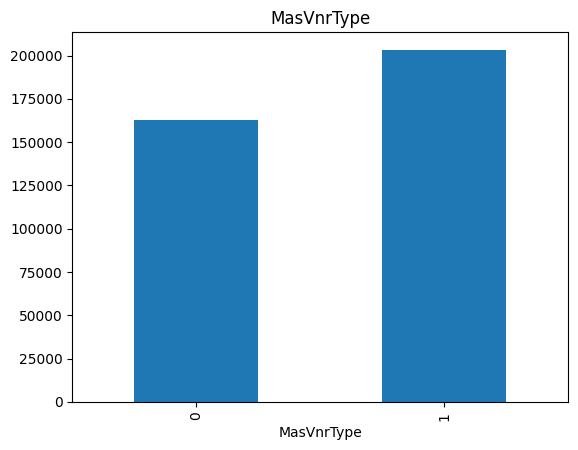

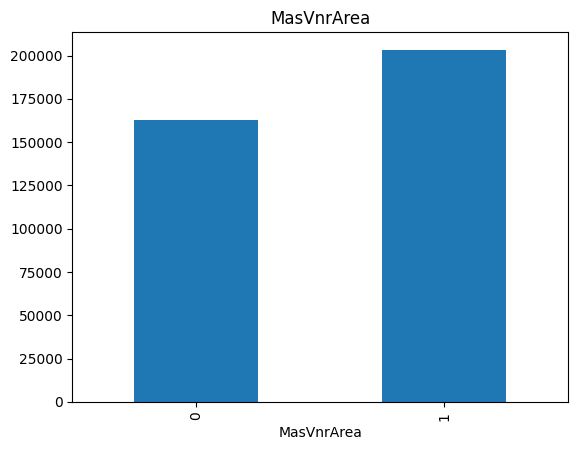

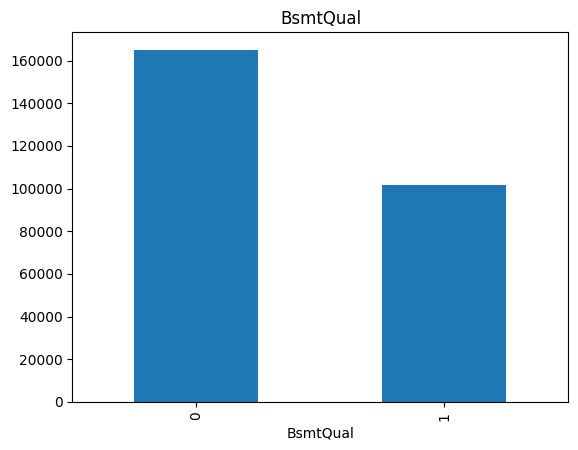

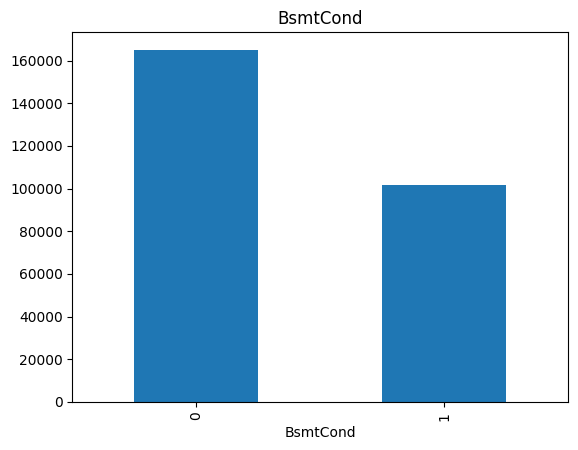

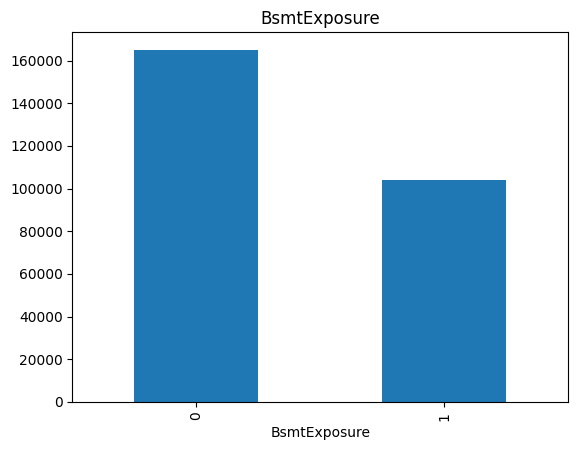

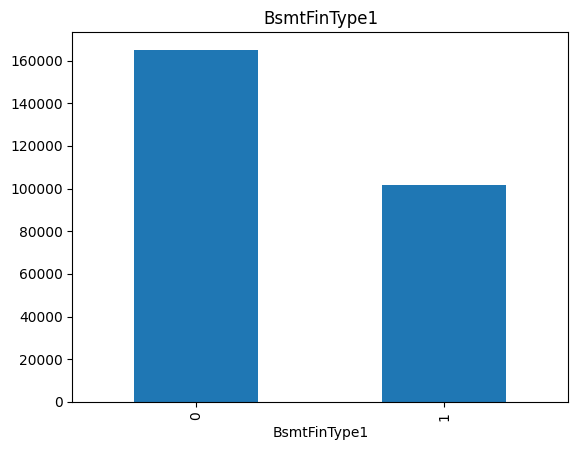

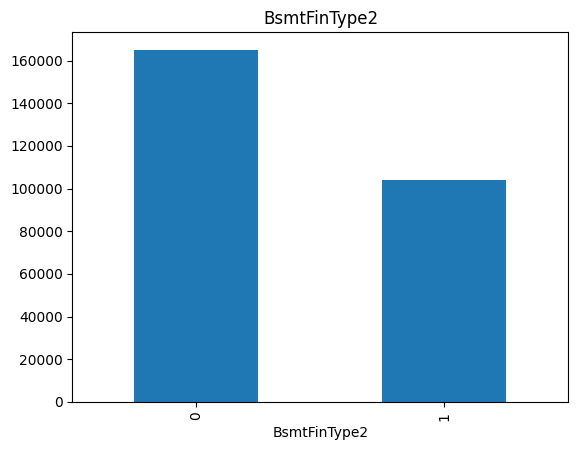

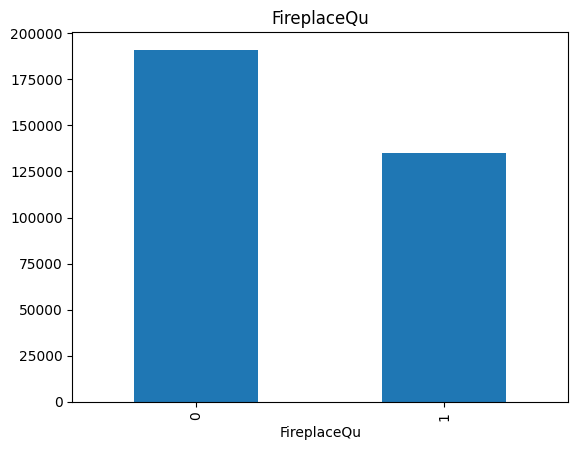

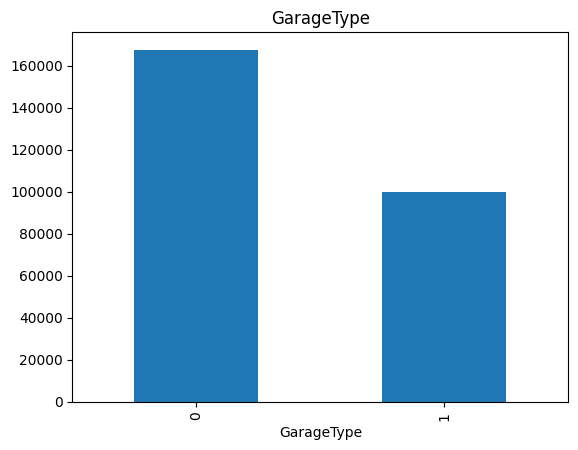

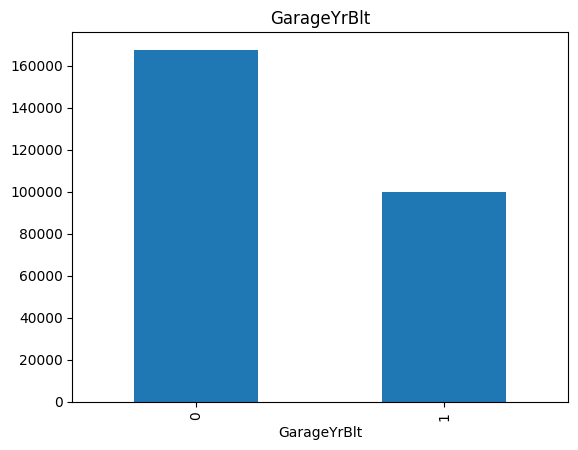

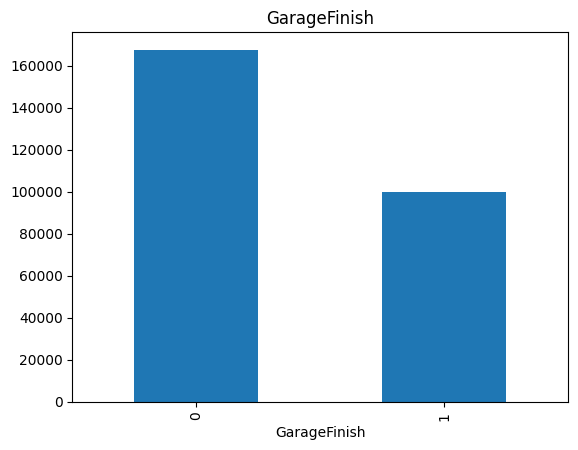

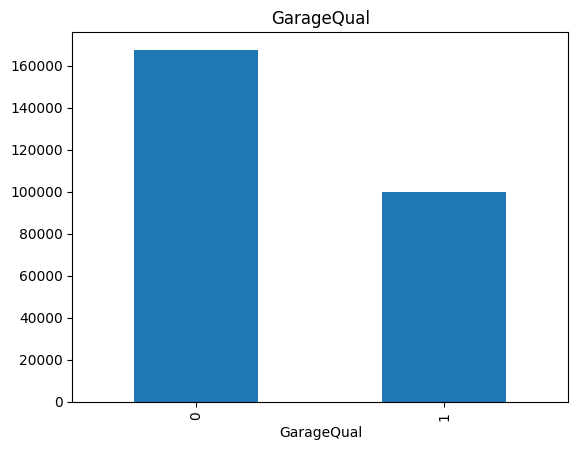

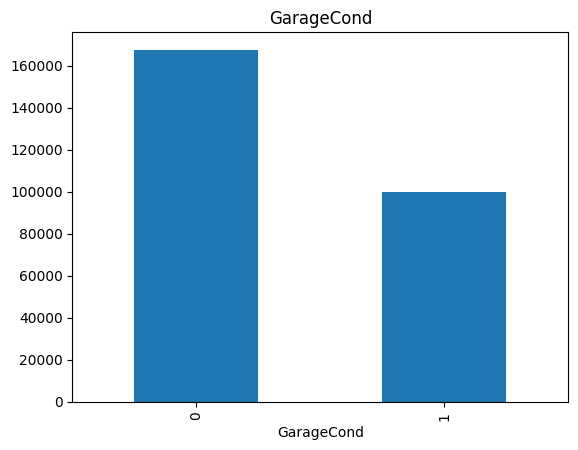

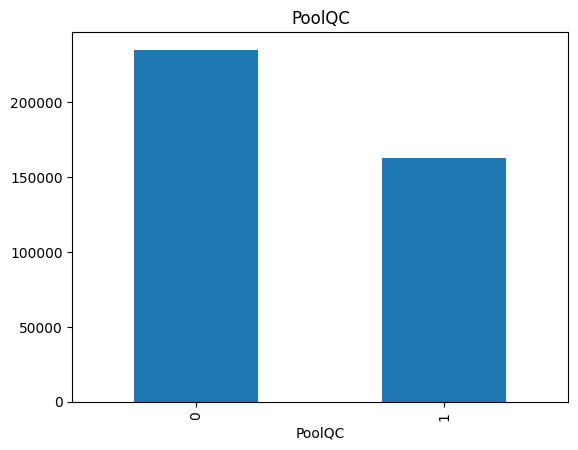

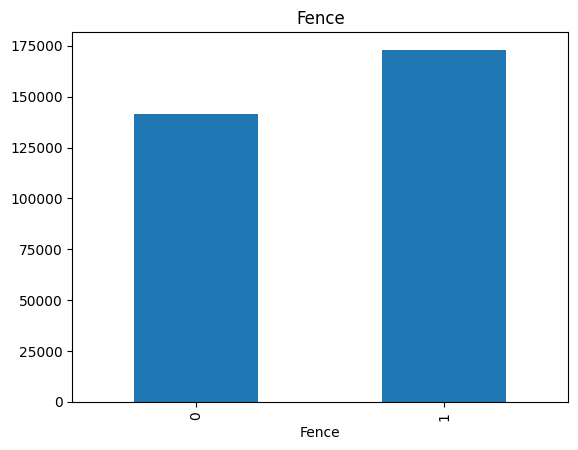

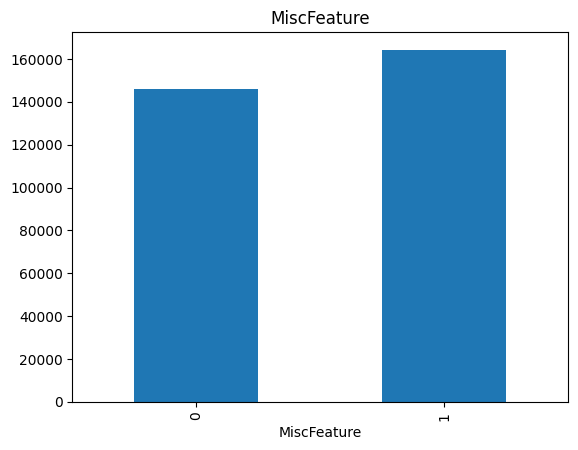

In [270]:
for feature in features_with_na:
  data2=data.copy()
  data2[feature]=np.where(data2[feature].isnull(),1,0)
  data2.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()


In [271]:

def get_features_with_numerics(data):
  feature_with_numerics=[feature for feature in data.columns if data[feature].dtype != 'O']

  print(len(feature_with_numerics))

  data[feature_with_numerics].head()
  return feature_with_numerics

feature_with_numerics=get_features_with_numerics(data)
test_feature_with_numerics=get_features_with_numerics(test_data)

38
37


In [272]:
def get_features_with_year(feature_with_numerics):
  year_features=[feature for feature in feature_with_numerics if 'Yr' in feature or 'Year' in feature]

  print(year_features)
  return year_features

year_features=get_features_with_year(feature_with_numerics)
test_year_features=get_features_with_year(test_feature_with_numerics)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [273]:
for feature in year_features:
  print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

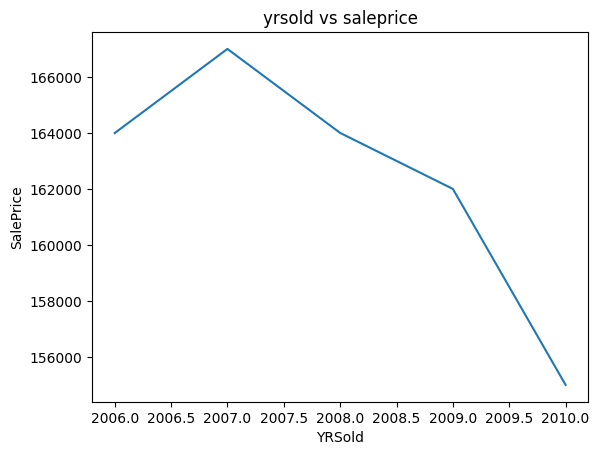

In [274]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YRSold')
plt.ylabel('SalePrice')
plt.title('yrsold vs saleprice')
plt.show()

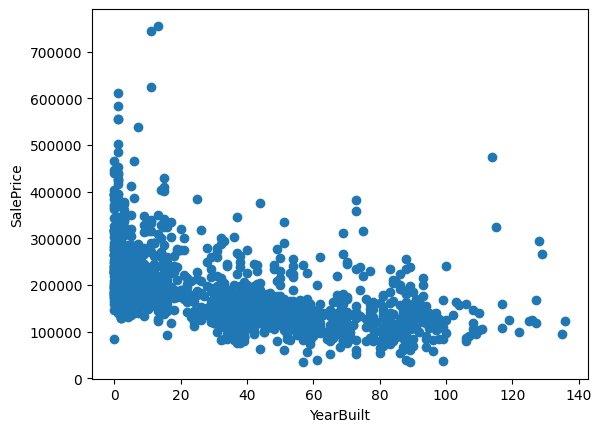

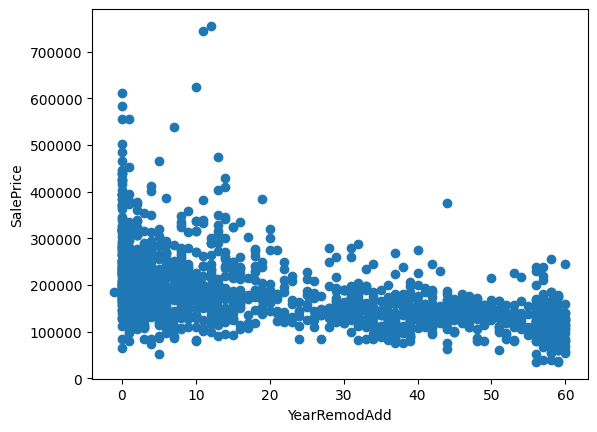

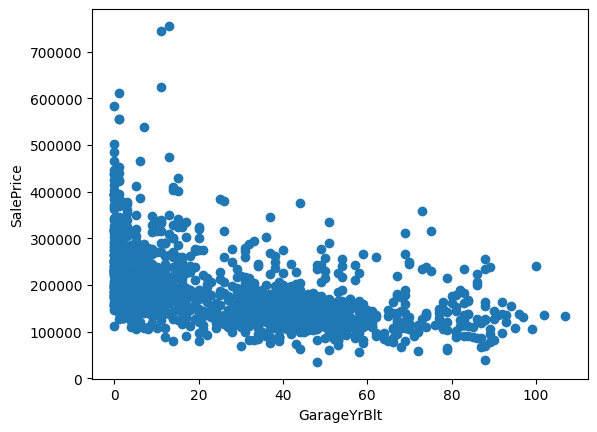

In [275]:
for feature in year_features:
  if feature != 'YrSold':
    data2=data.copy()
    data2[feature]=data2['YrSold']-data2[feature]
    plt.scatter(data2[feature],data2['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [276]:
def get_discrete_features(feature_with_numerics):
  discrete_feature=[feature for feature in feature_with_numerics if len(data[feature].unique())<25 and feature not in year_features+['Id']]

  print("no.of discrete features: ",len(discrete_feature))
  return discrete_feature

discrete_feature=get_discrete_features(feature_with_numerics)
test_discrete_feature=get_discrete_features(test_feature_with_numerics)

no.of discrete features:  17
no.of discrete features:  17


In [277]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

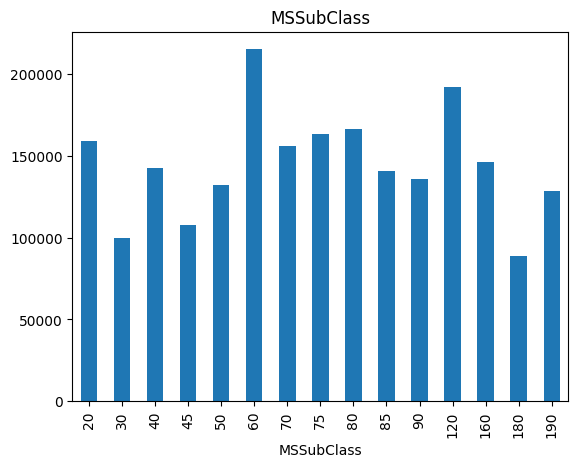

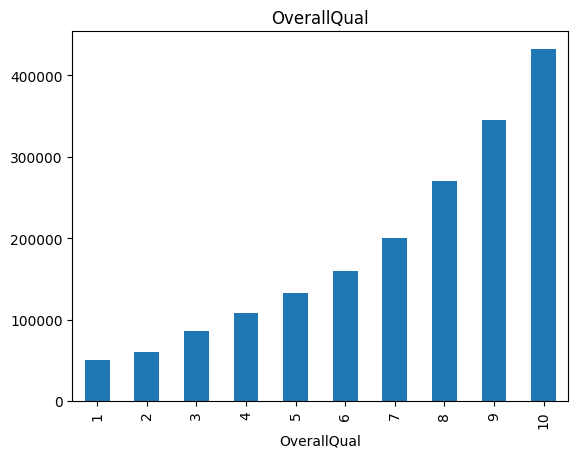

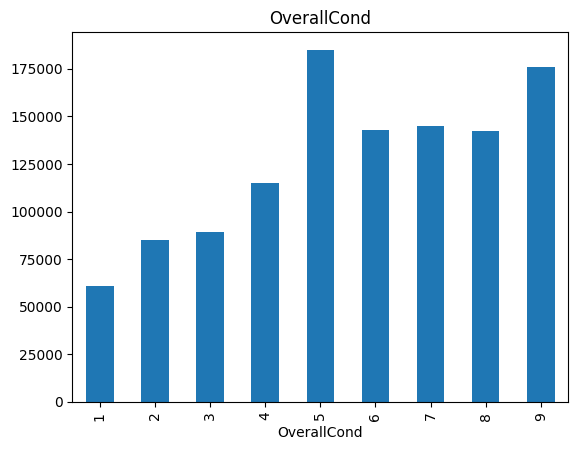

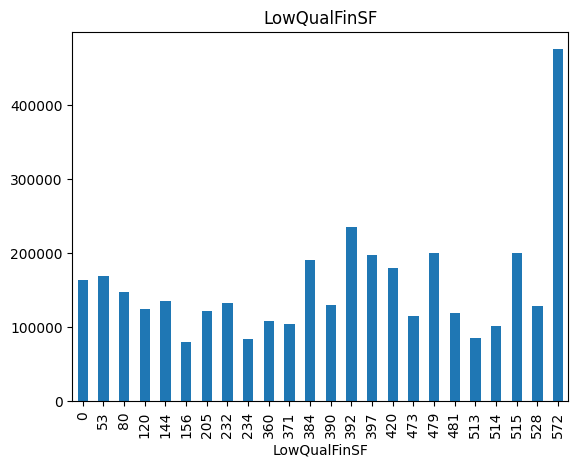

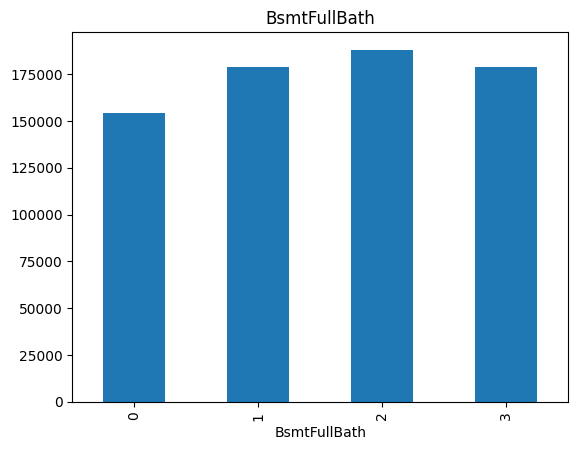

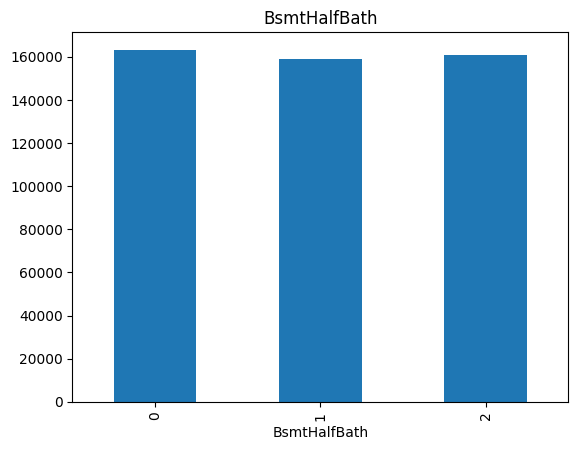

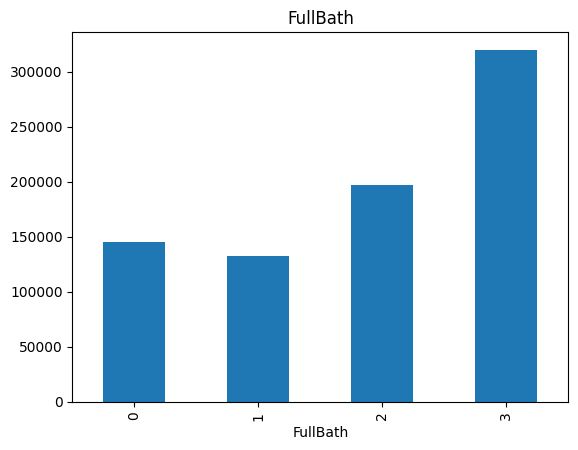

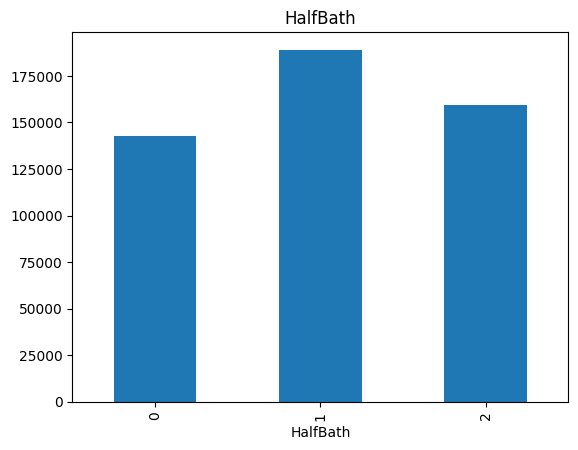

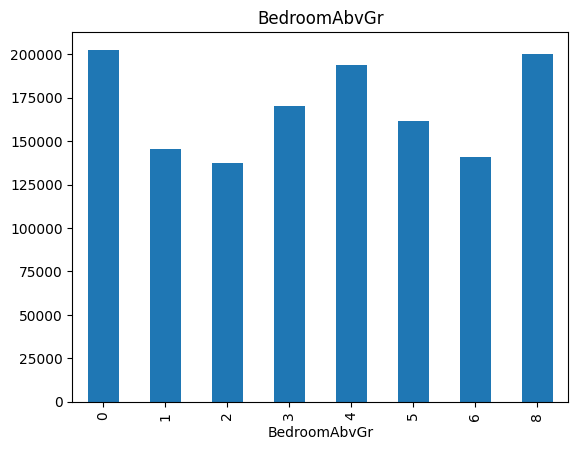

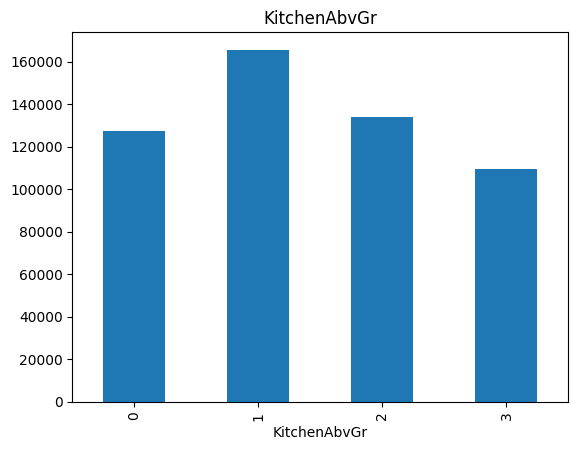

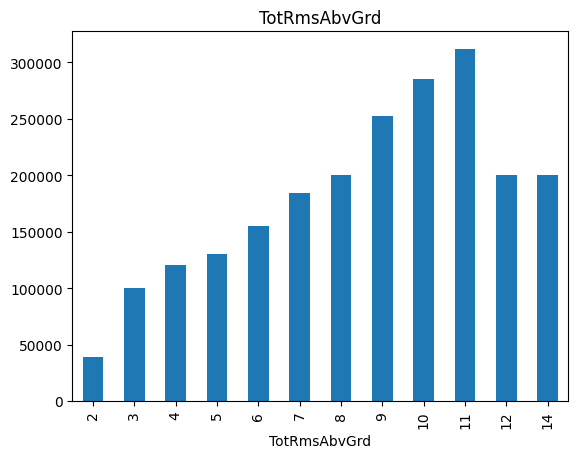

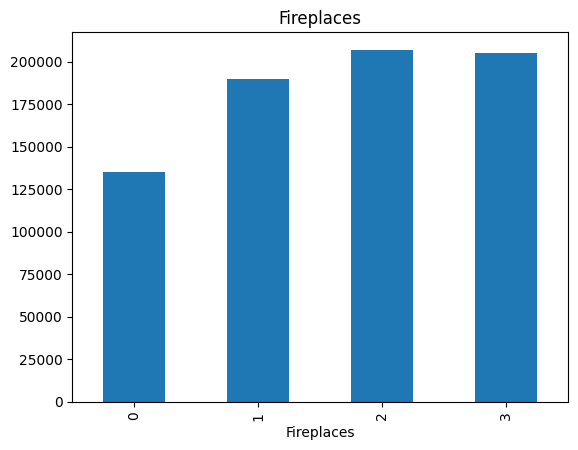

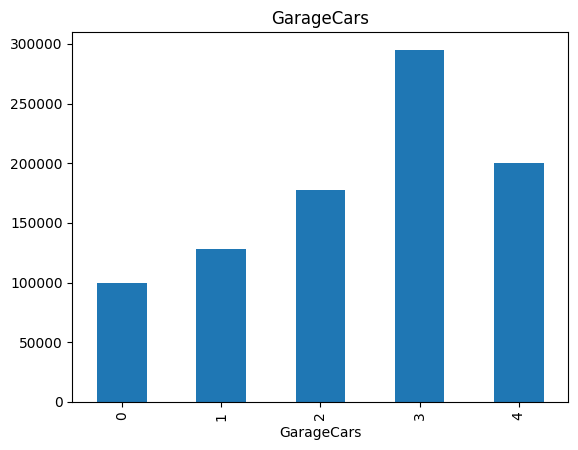

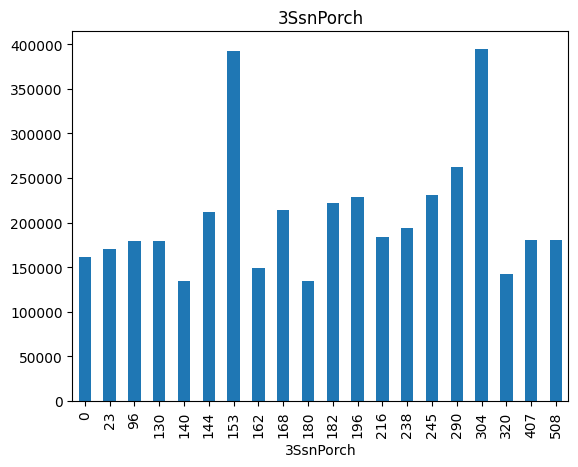

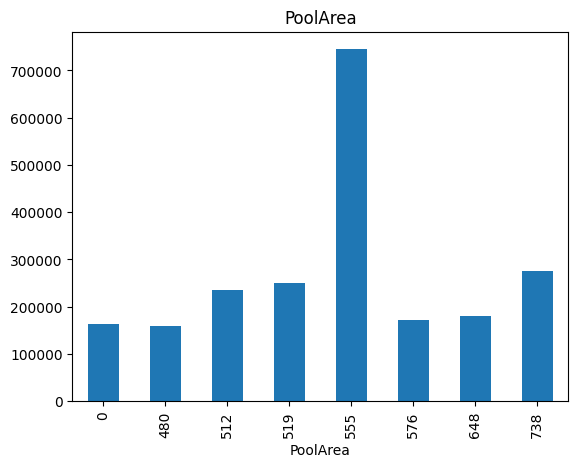

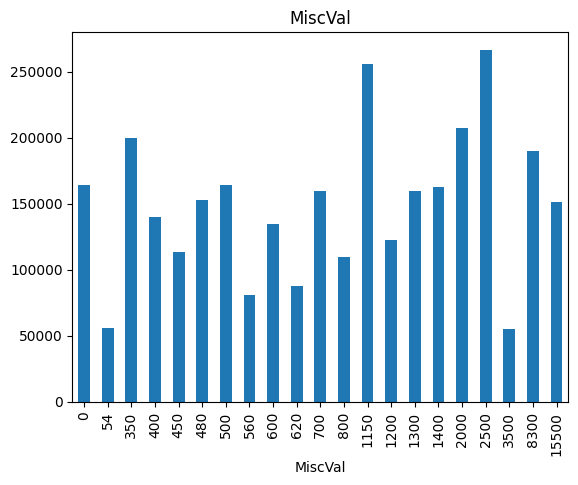

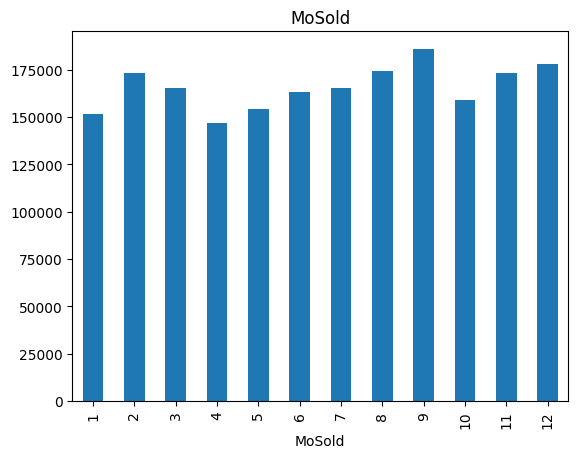

In [278]:
for feature in discrete_feature:
  data2=data.copy()
  data2.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [279]:
def get_continuous_features(feature_with_numerics):
  continuous_features=[feature for feature in feature_with_numerics if feature not in discrete_feature+year_features+['Id']]

  print("no.of continuous features: ",len(continuous_features))
  return continuous_features

continuous_features=get_continuous_features(feature_with_numerics)
test_continuous_features=get_continuous_features(test_feature_with_numerics)

no.of continuous features:  16
no.of continuous features:  15


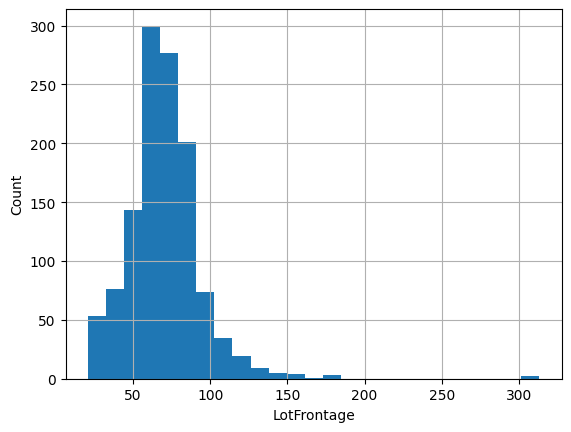

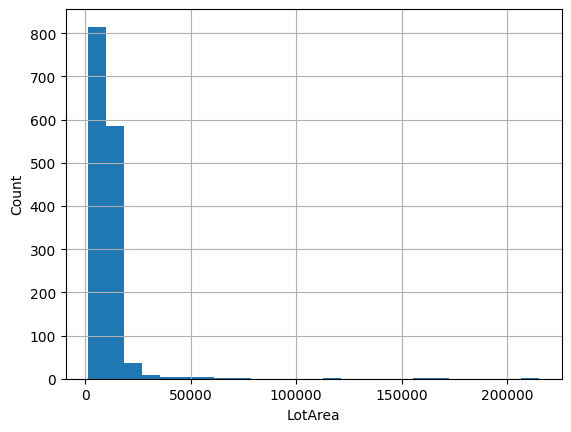

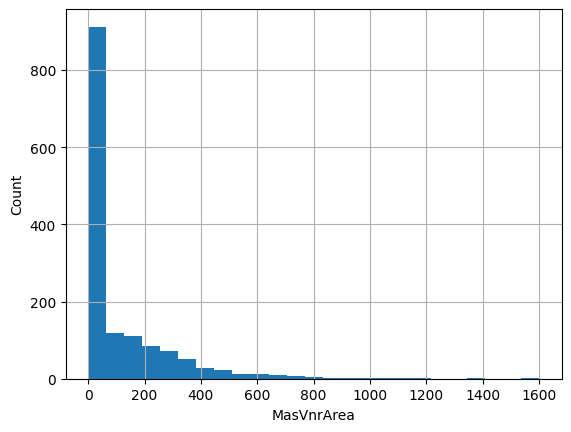

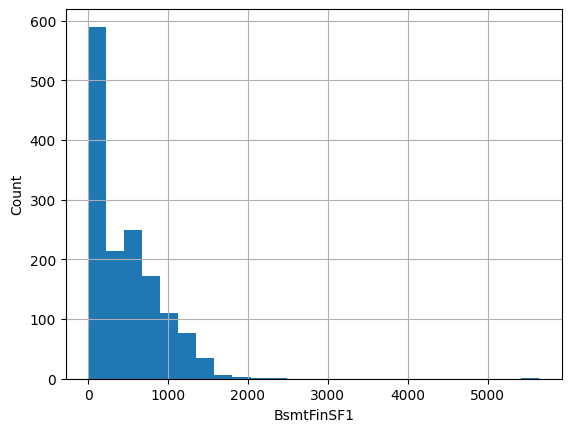

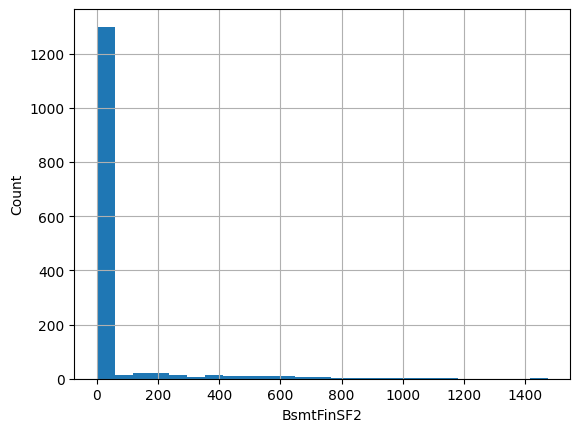

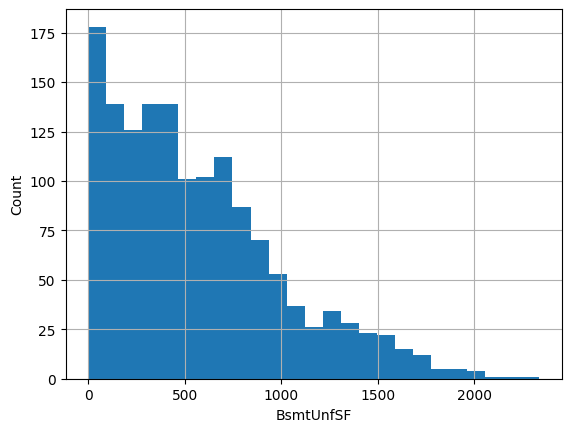

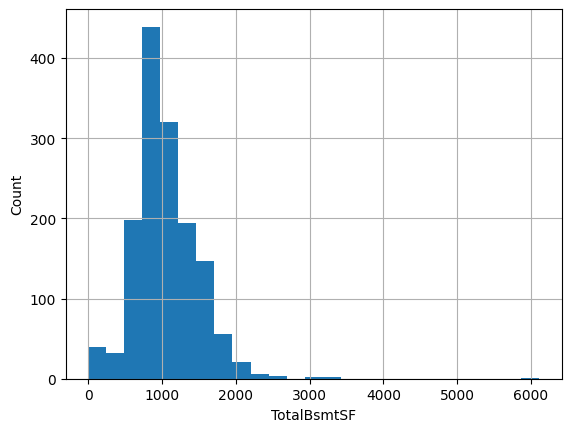

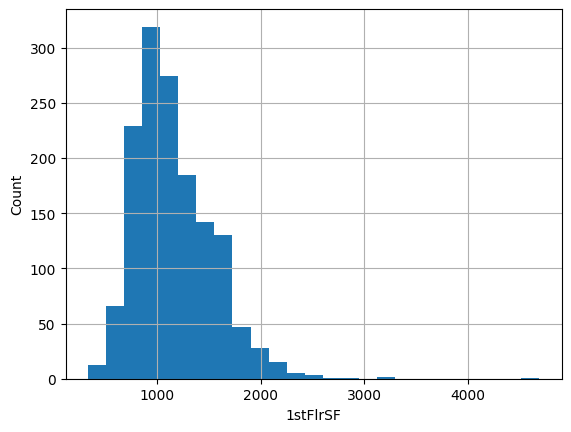

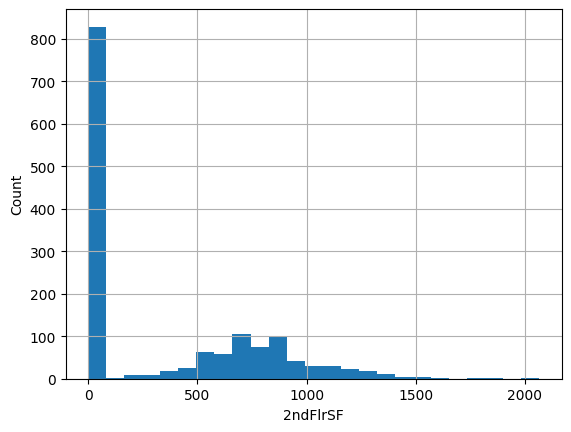

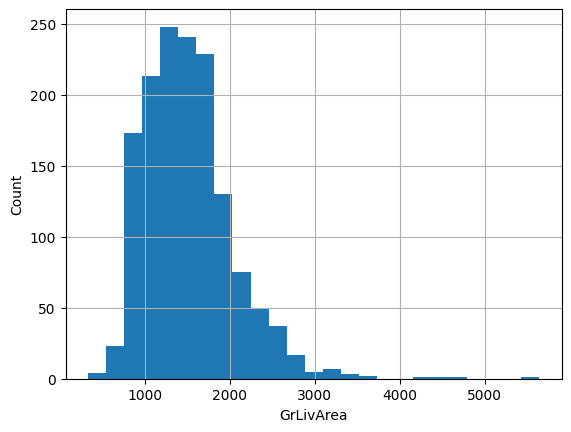

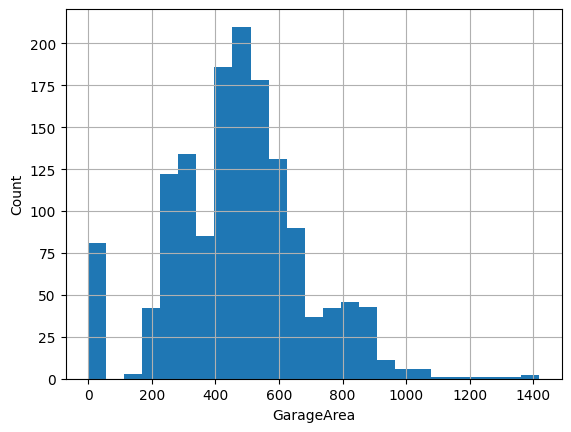

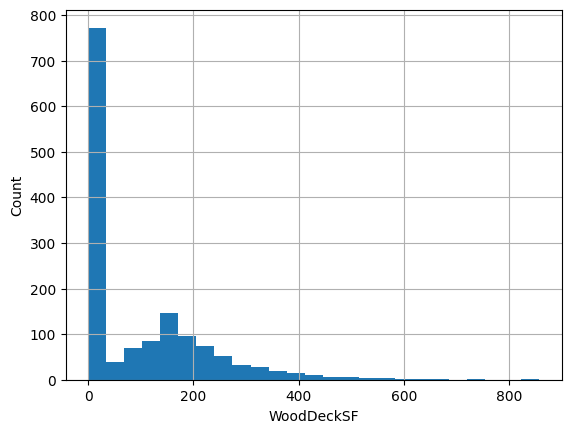

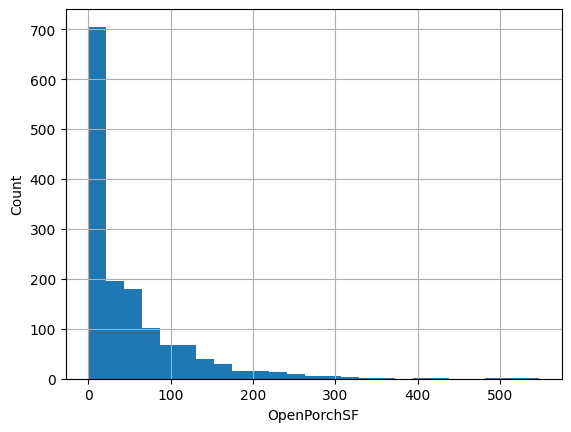

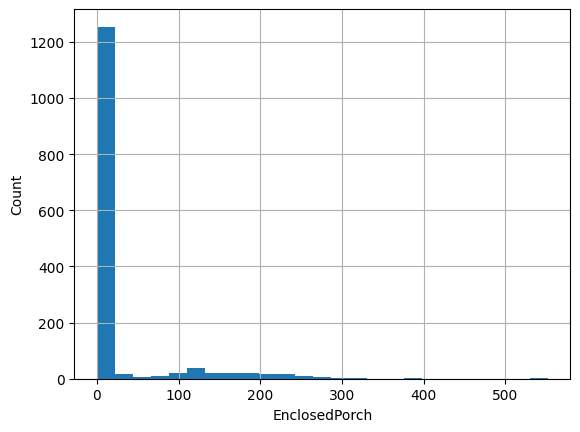

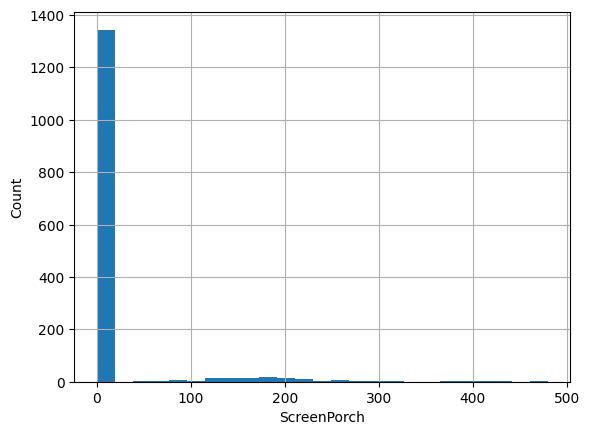

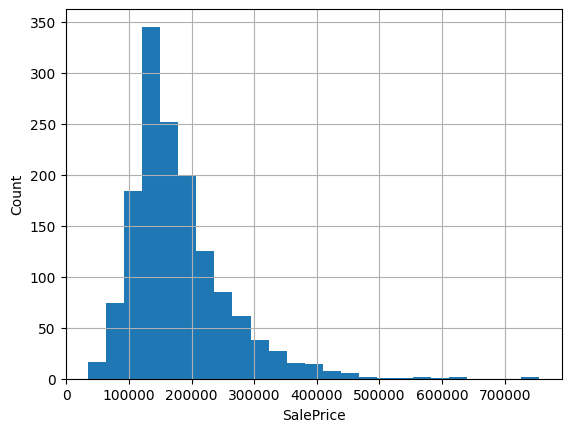

In [280]:
for feature in continuous_features:
  if feature != 'YrSold':
    data2=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

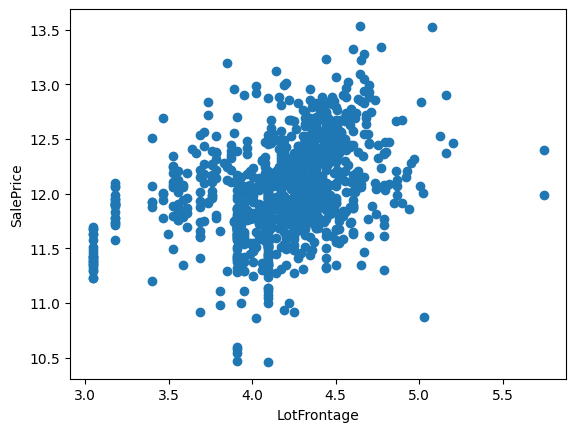

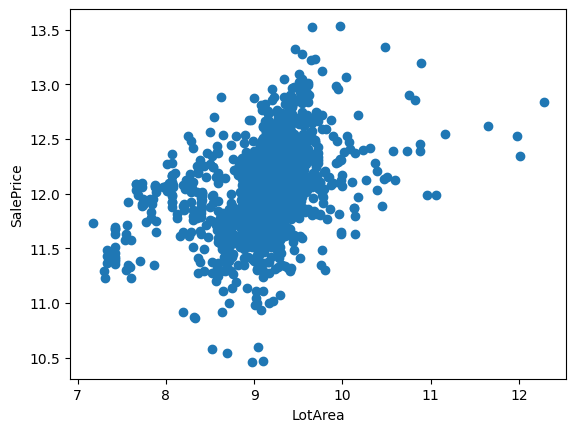

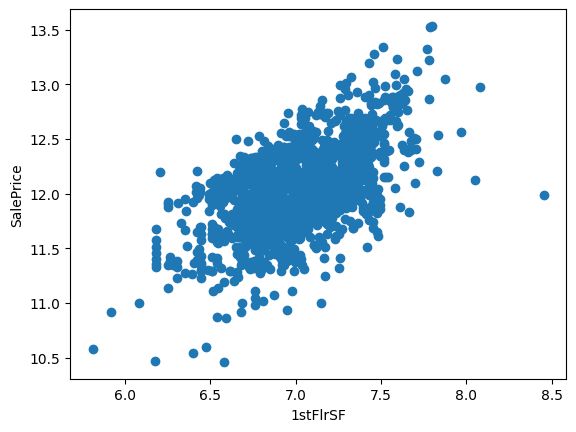

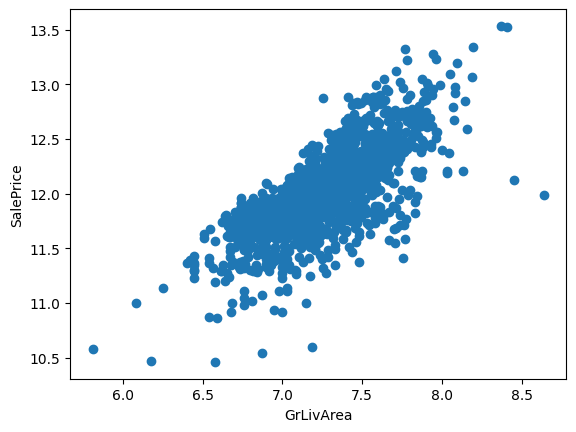

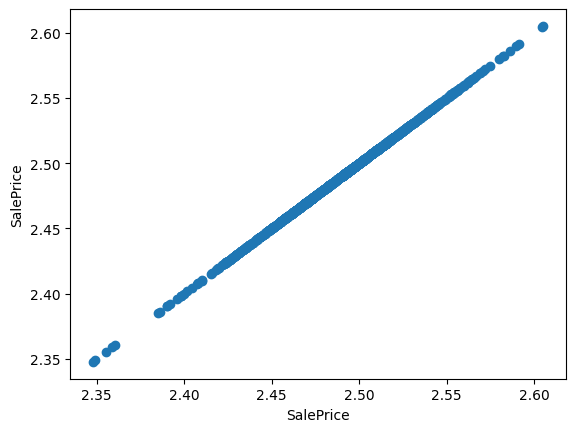

In [281]:
for feature in continuous_features:
  data2=data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data2[feature]=np.log(data2[feature])
    data2['SalePrice']=np.log(data2['SalePrice'])
    plt.scatter(data2[feature],data2['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

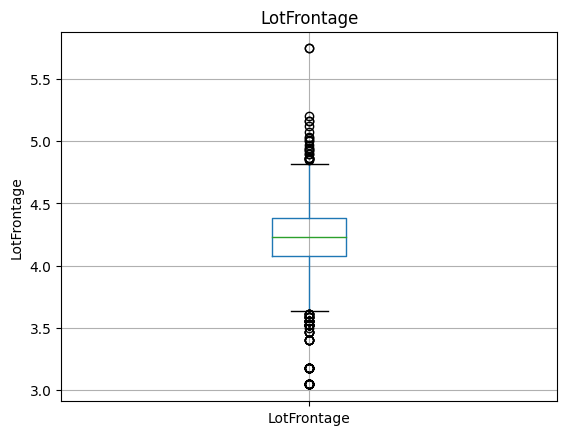

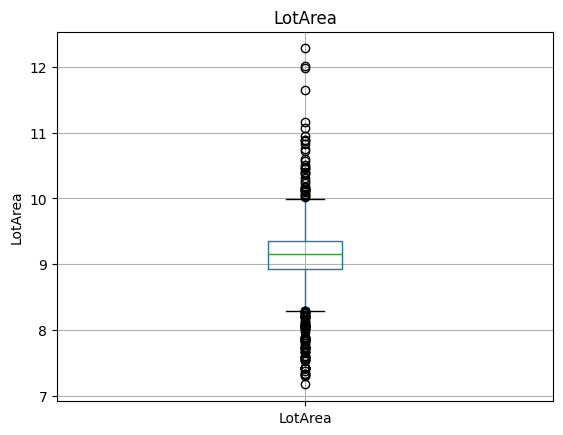

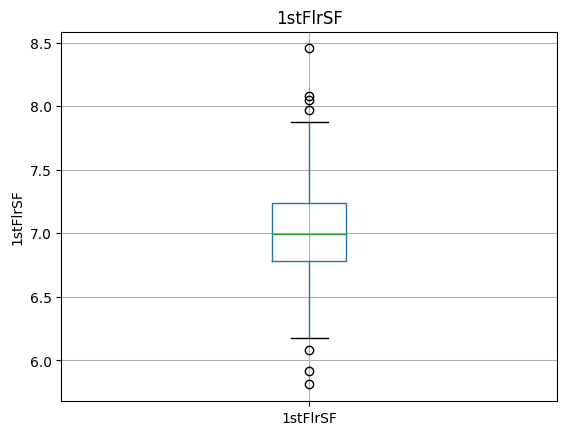

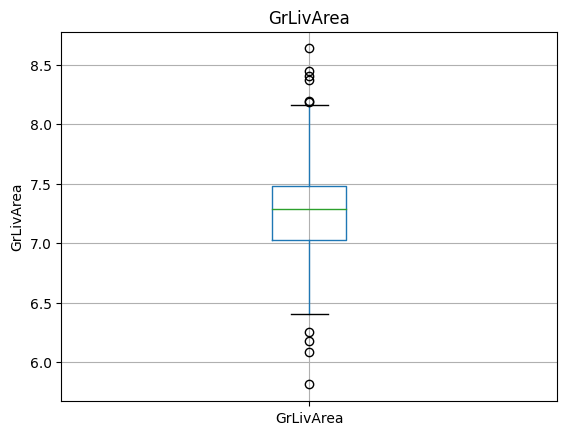

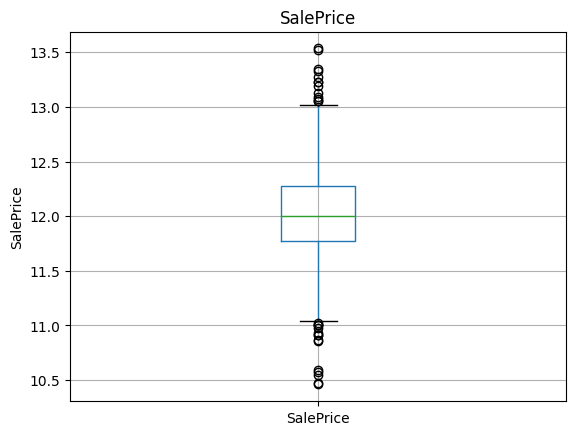

In [282]:
for feature in continuous_features:
  data2=data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data2[feature]=np.log(data2[feature])
    data2.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [283]:
def get_categorical_features(data):
  categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']
  print(categorical_features)
  print(len(categorical_features))
  return categorical_features

categorical_features=get_categorical_features(data)
test_categorical_features=get_categorical_features(test_data)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', '

In [284]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [285]:
for feature in categorical_features:
  print(feature,len(data[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


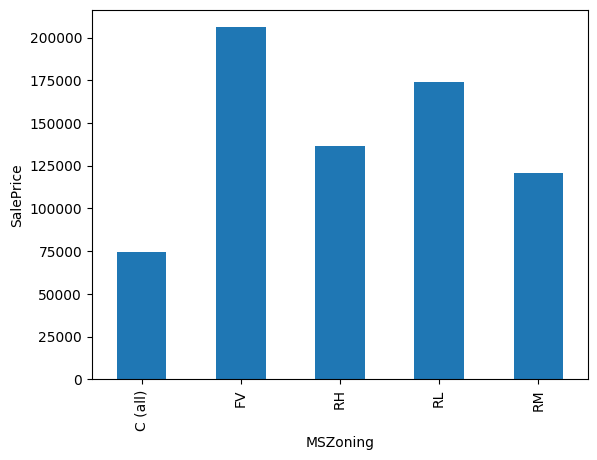

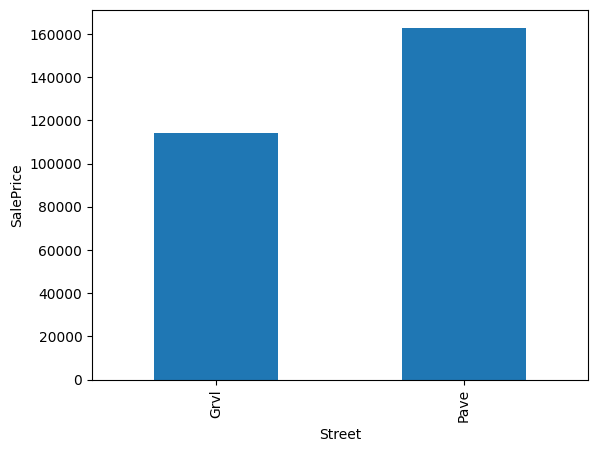

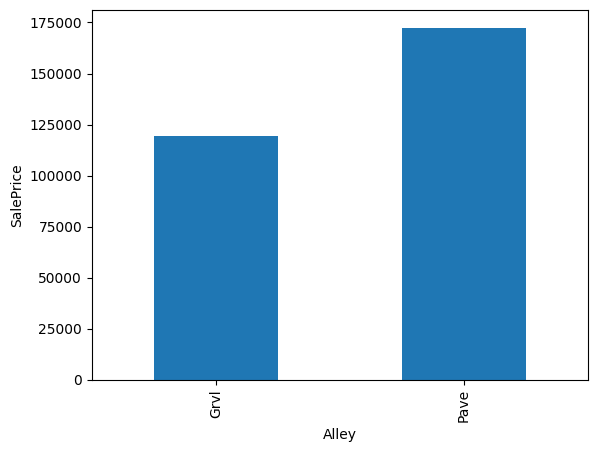

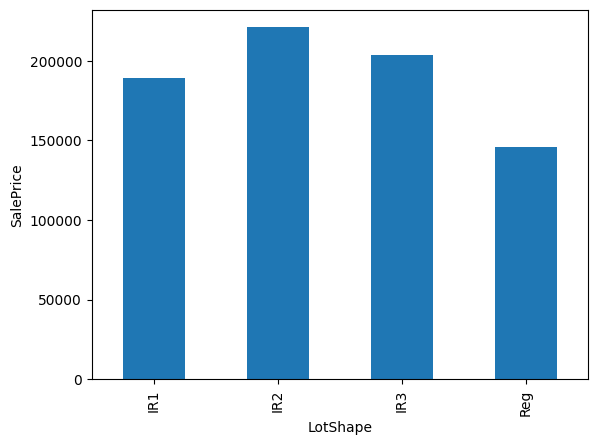

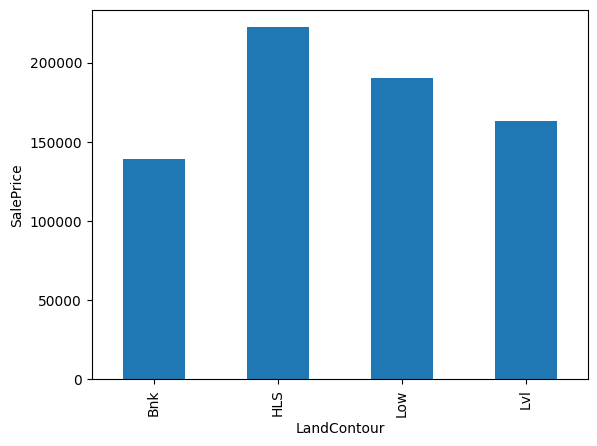

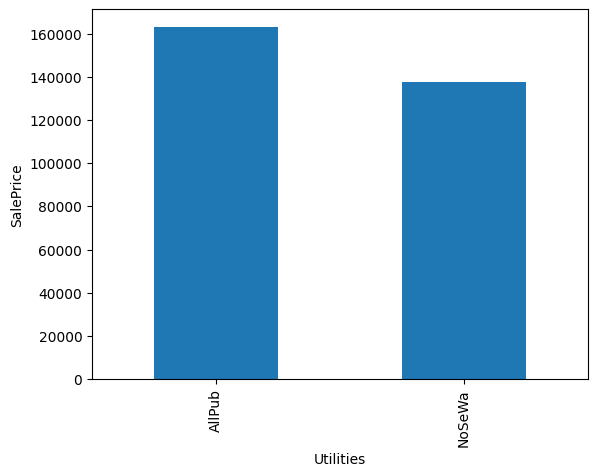

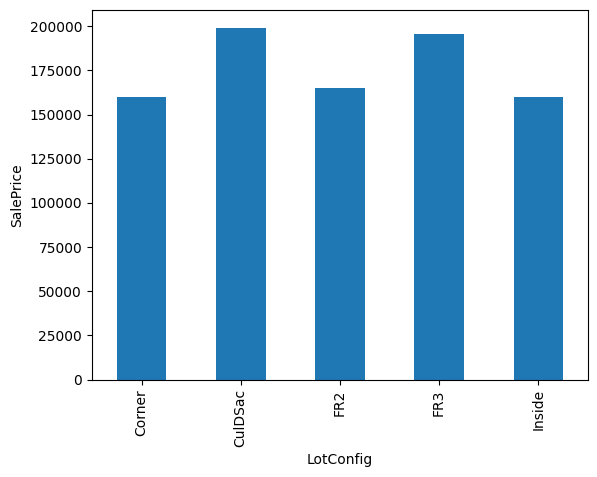

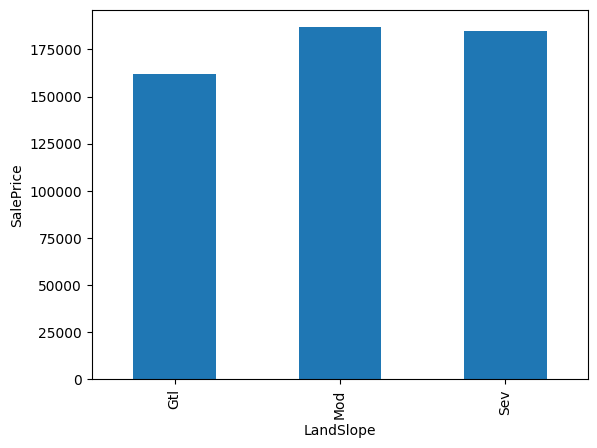

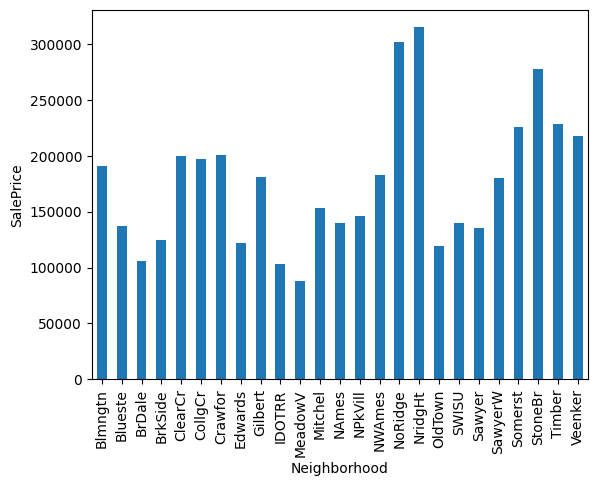

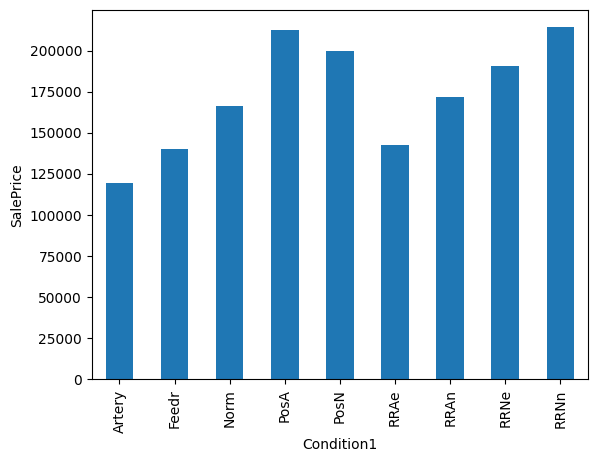

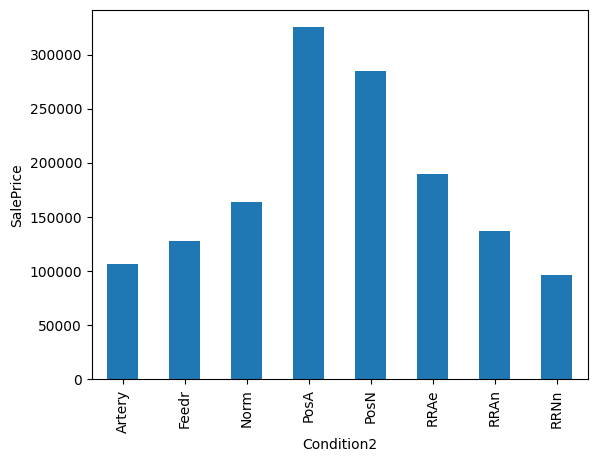

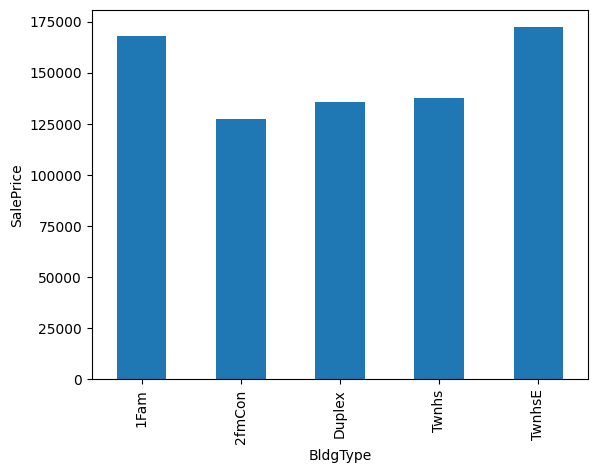

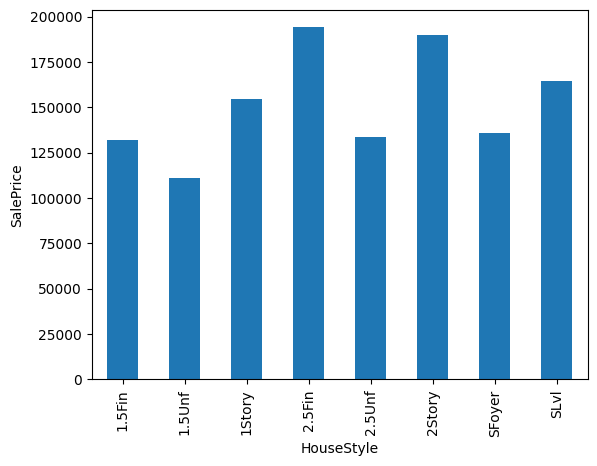

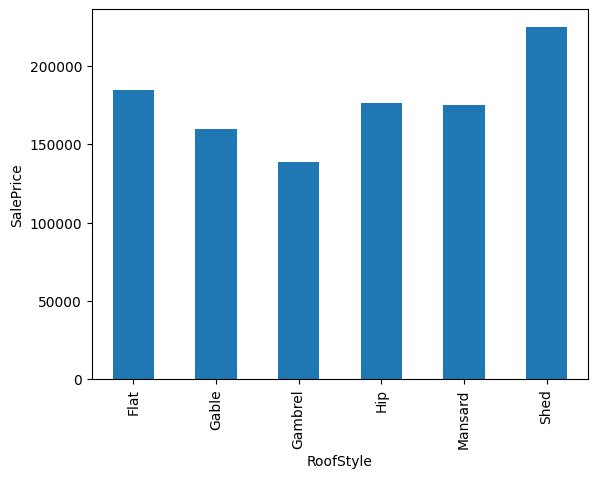

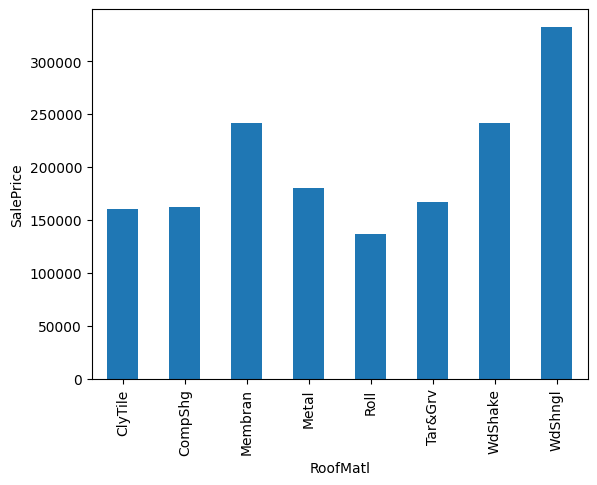

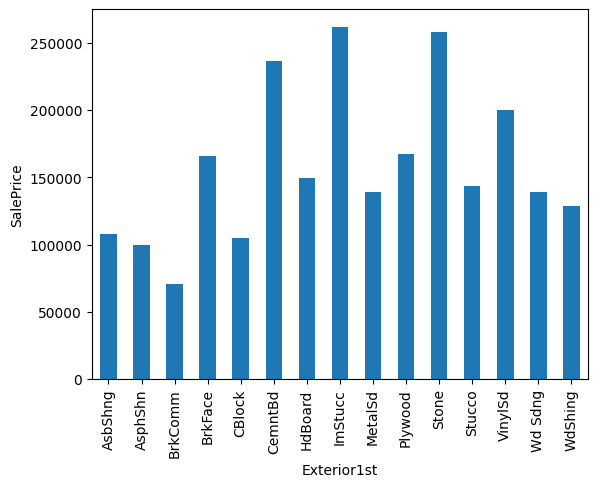

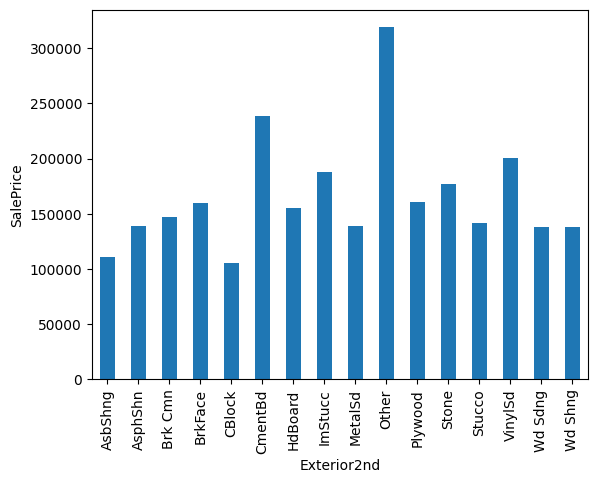

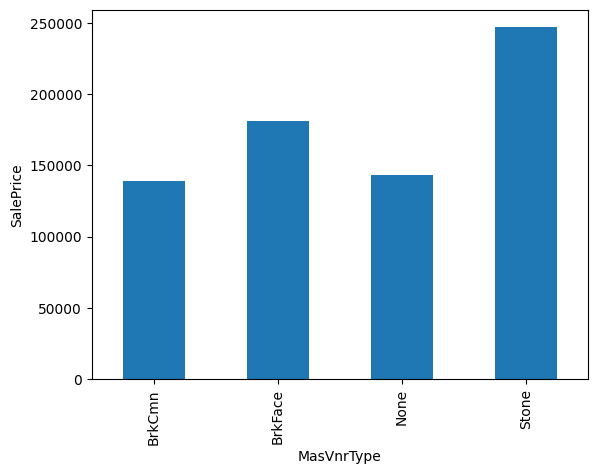

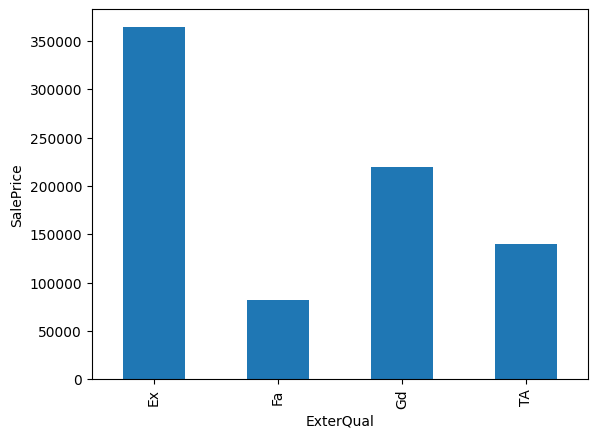

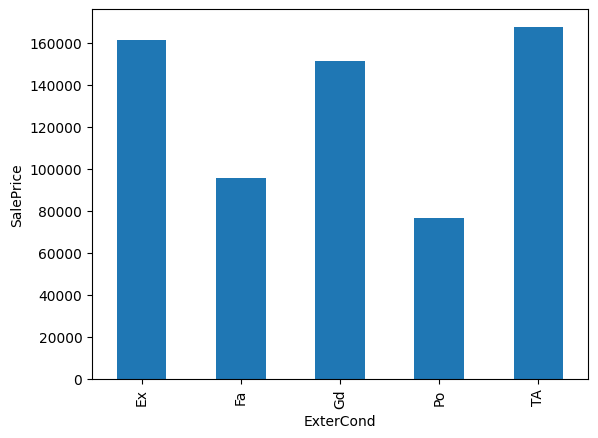

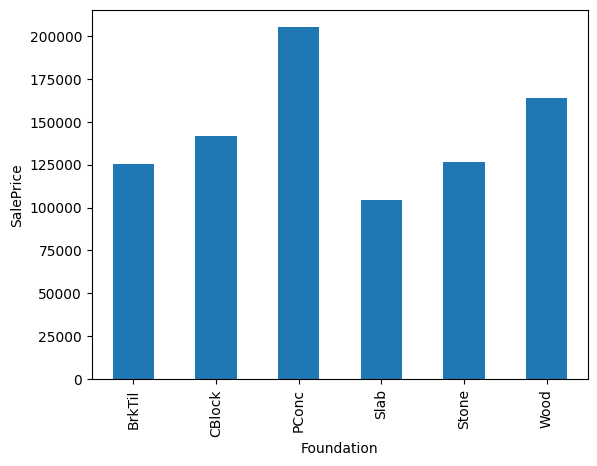

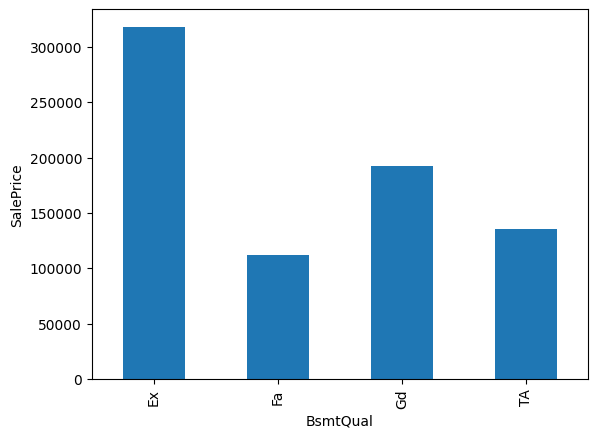

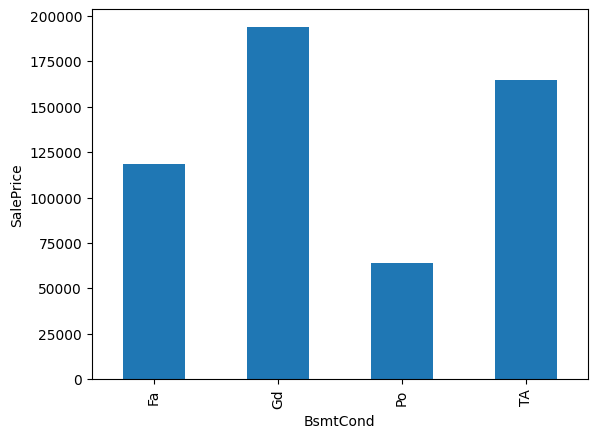

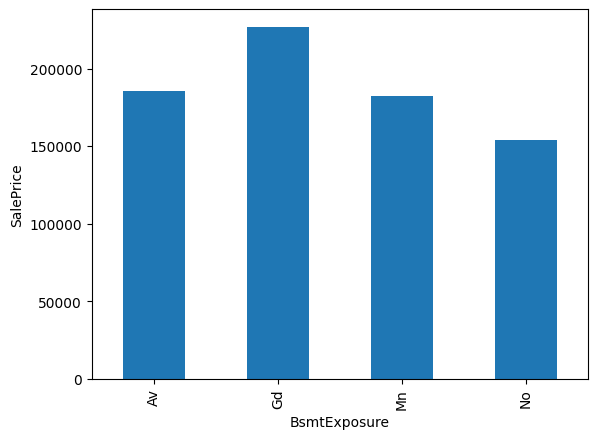

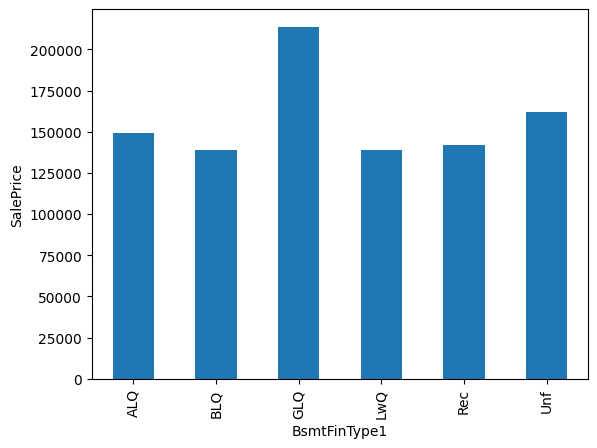

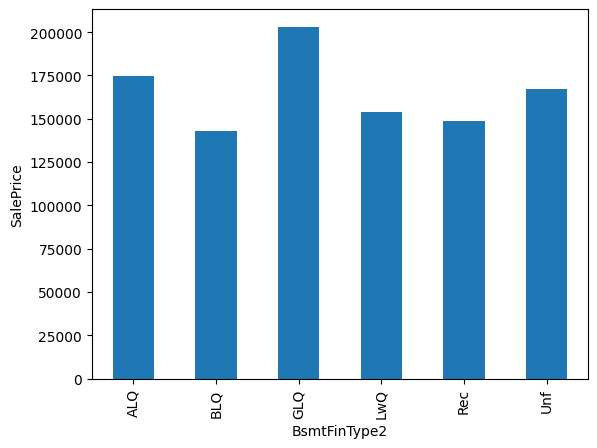

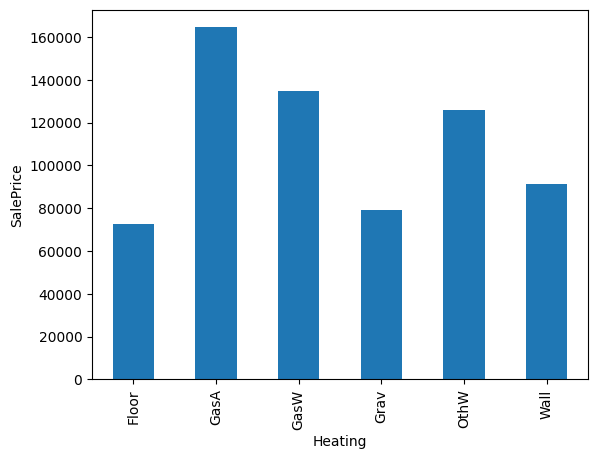

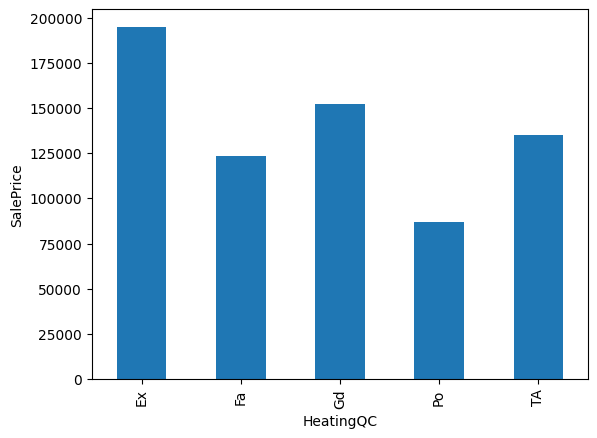

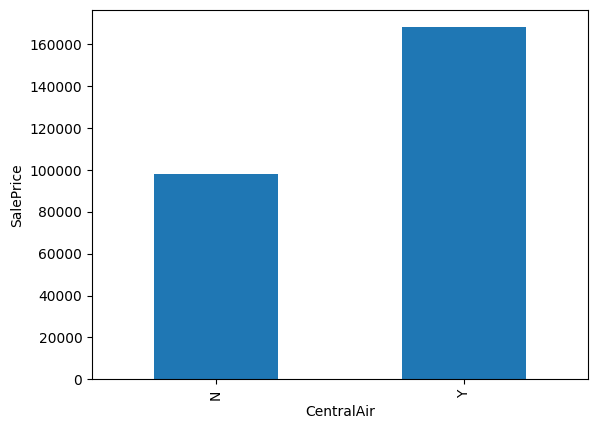

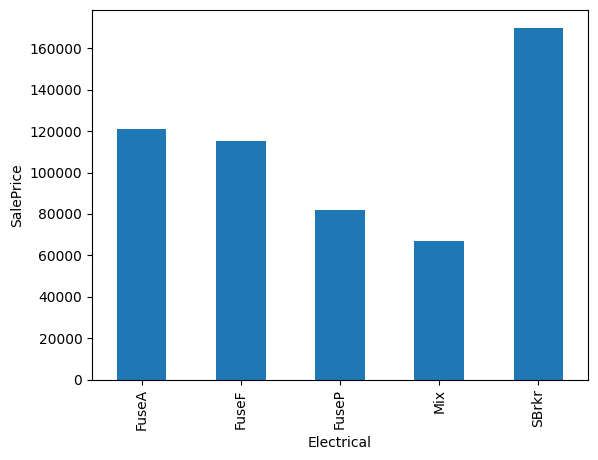

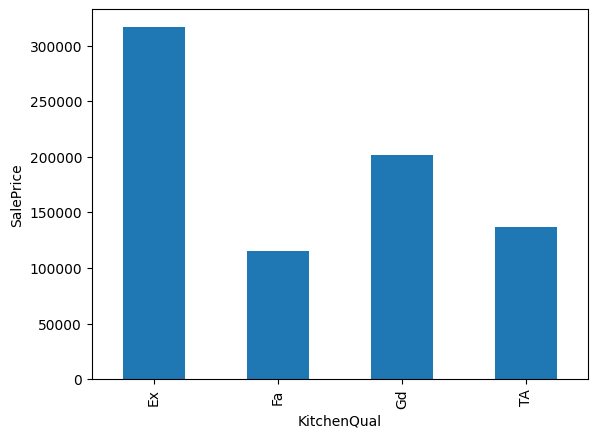

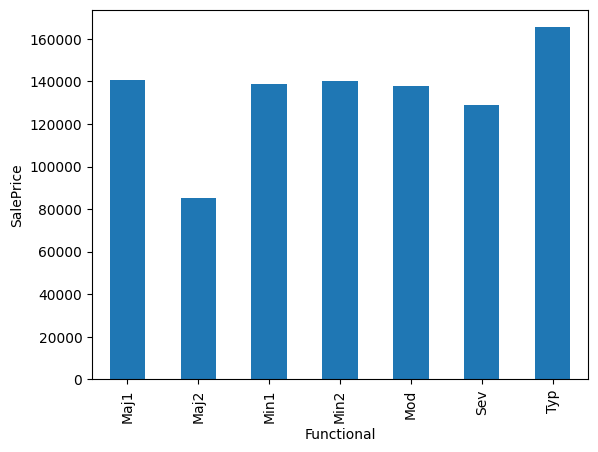

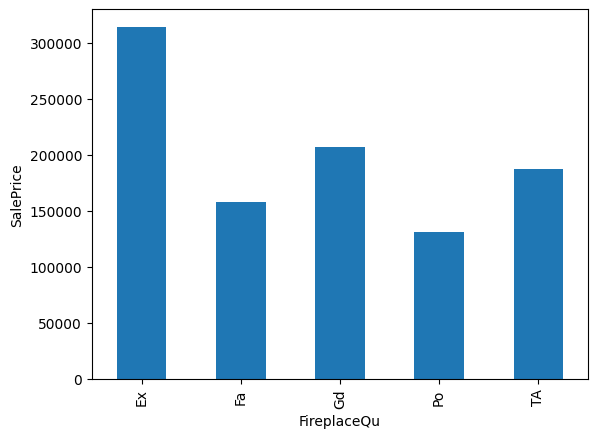

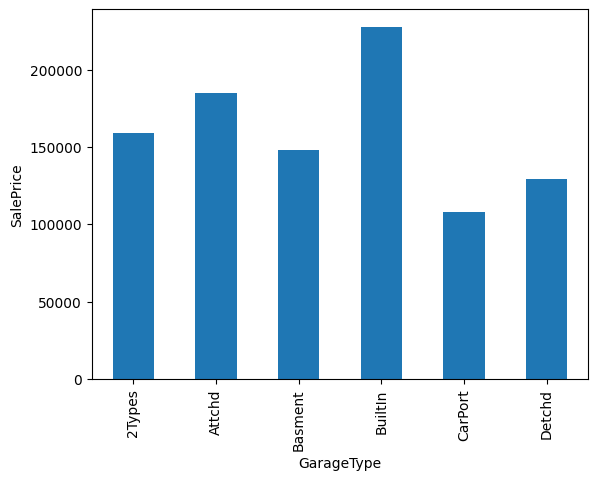

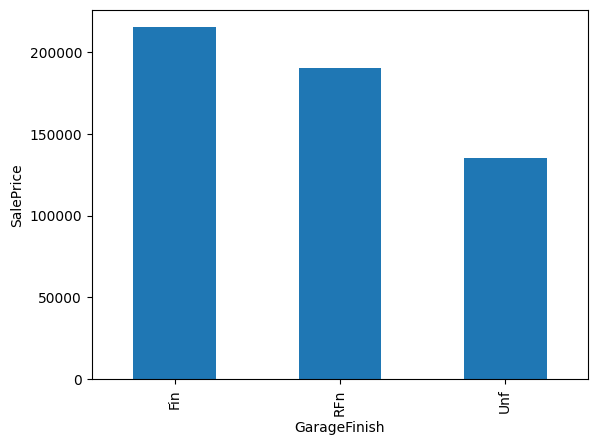

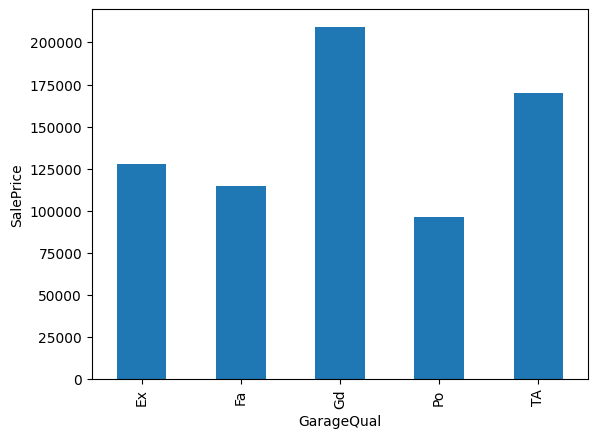

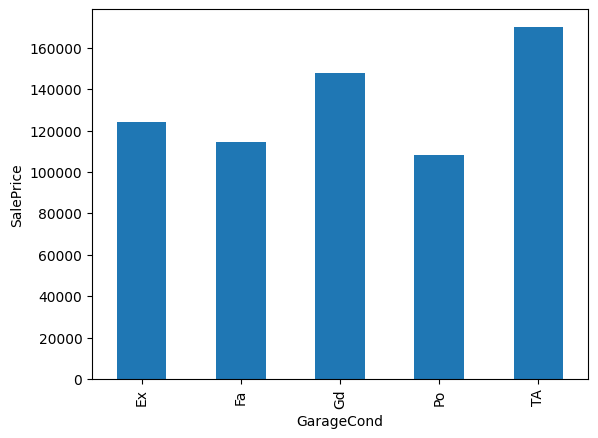

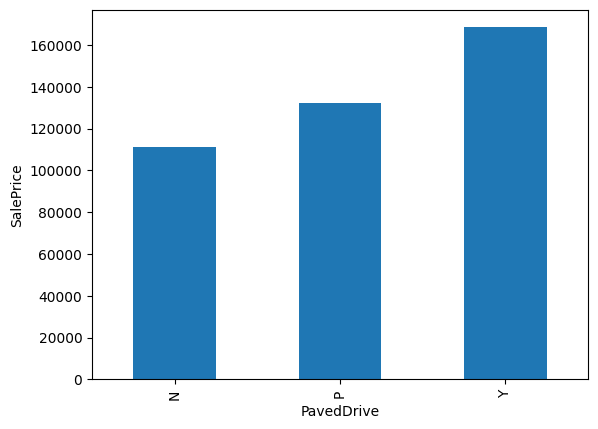

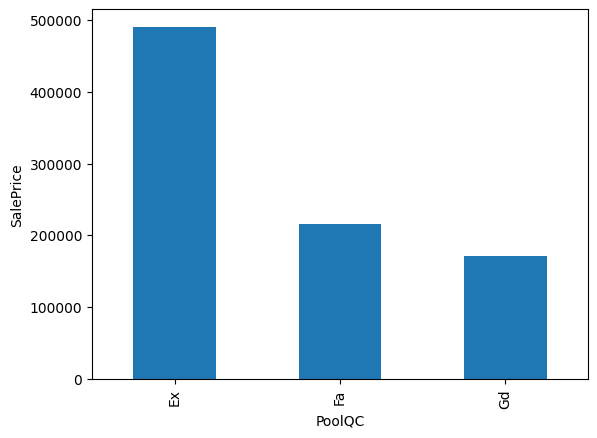

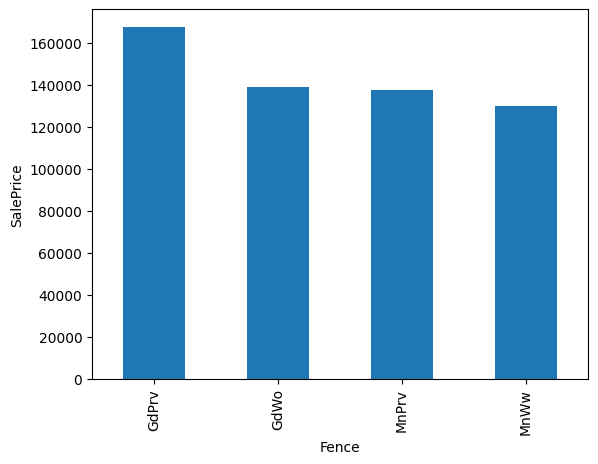

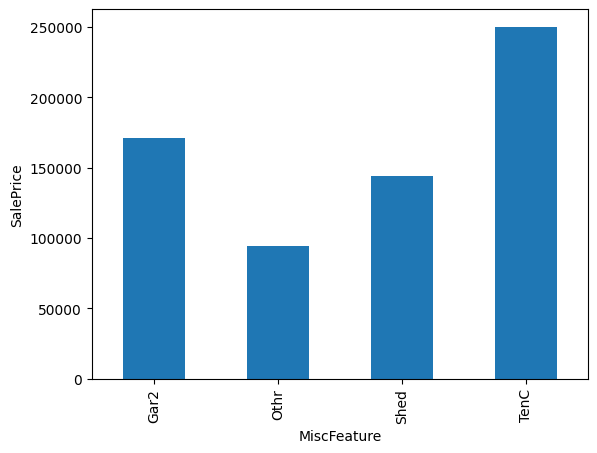

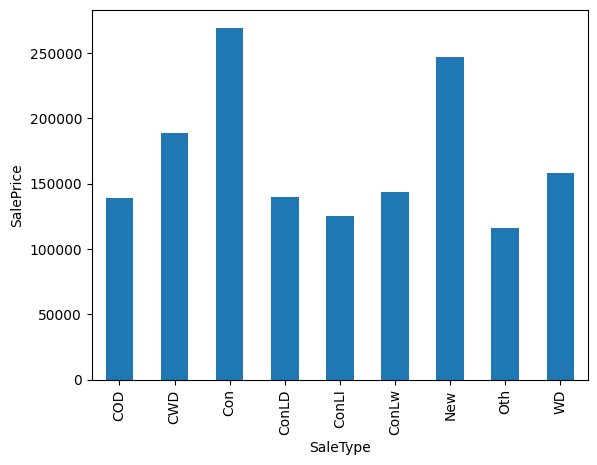

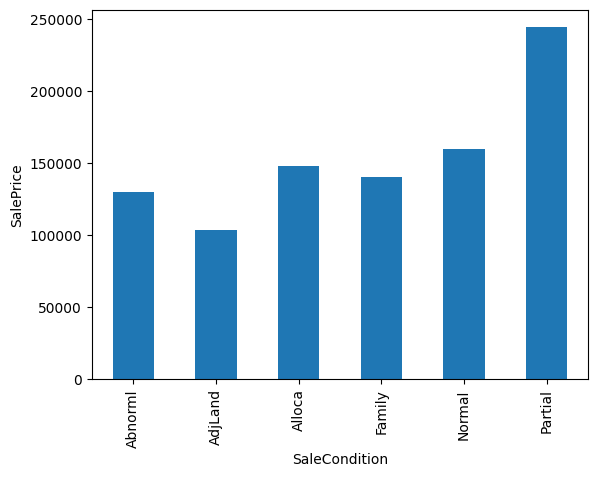

In [286]:
for feature in categorical_features:
  data2=data.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

In [287]:
def get_cat_features_with_nan(data):
  features_nan=[feature for feature in data.columns if data[feature].isnull().sum() >1 and data[feature].dtype=='O']
  return features_nan

features_nan=get_cat_features_with_nan(data)
test_features_nan=get_cat_features_with_nan(test_data)

In [288]:
def replace_cat_features(dataset,features_nan):
  data2=dataset.copy()
  data2[features_nan]=data2[features_nan].fillna('Missing')
  return data2

data=replace_cat_features(data,features_nan)
data[features_nan].isnull().sum()

test_data=replace_cat_features(test_data,test_features_nan)
test_data[test_features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [289]:
def get_numerics_with_nan(feature_with_numerics):
  numerics_with_nan=[feature for feature in feature_with_numerics if data[feature].isnull().sum()>1]
  for feature in numerics_with_nan:
    print(feature)
  return numerics_with_nan

numerics_with_nan=get_numerics_with_nan(feature_with_numerics)
test_numerics_with_nan=get_numerics_with_nan(test_feature_with_numerics)

LotFrontage
MasVnrArea
GarageYrBlt
LotFrontage
MasVnrArea
GarageYrBlt


In [290]:
def replace_null_in_numeric(data,numerics_with_nan):
  for feature in numerics_with_nan:
    median_value=data[feature].median()
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
  return data

data=replace_null_in_numeric(data,numerics_with_nan)
test_data=replace_null_in_numeric(test_data,test_numerics_with_nan)

In [291]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  data[feature]=data['YrSold']-data[feature]

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  test_data[feature]=test_data['YrSold']-test_data[feature]

In [292]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [293]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,0,6,2010,WD,Normal,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,Missing,Missing,0,1,2010,WD,Normal,0,0,0


In [294]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [295]:
test_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [296]:
def log_distribution(data,num_features):
  print(data.head())
  for feature in num_features:
    data[feature]=np.log(data[feature])
  return data

num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
data=log_distribution(data,num_features)

num_features2=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
test_data=log_distribution(test_data,num_features2)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...     Missing       0      2   2008       WD   
1         Lvl    AllPub  ...     Missing       0      5   2007       WD   
2         Lvl    AllPub  ...     Missing       0      9   2008       WD   
3         Lvl    AllPub  ...     Missing       0      2   2006       WD   
4         Lvl    AllPub  ...     Missing       0     12   2008       WD   

  SaleCondition SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0        No

In [297]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [298]:
def replace_null_in_categorical(data,categorical_features):
  for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
  return data

data=replace_null_in_categorical(data,categorical_features)
test_data=replace_null_in_categorical(data,test_categorical_features)

In [299]:
data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing,IR2,Lvl,AllPub,...,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,...,Missing,0,5,2007,WD,Normal,11.458997,0,0,0
98,99,30,RL,4.442651,9.270965,Pave,Missing,Reg,Lvl,AllPub,...,Shed,400,5,2010,COD,Abnorml,11.326596,0,0,0


In [300]:
def encoding_categorical_values(data,categorical_features):
  for feature in categorical_features:
      labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
      labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
      data[feature]=data[feature].map(labels_ordered)
  return data
data=encoding_categorical_values(data,categorical_features)
test_data=encoding_categorical_values(data,test_categorical_features)

In [301]:
from sklearn.preprocessing import MinMaxScaler

feature_to_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]
scaler=MinMaxScaler()
scaler.fit(data[feature_to_scale])

scaler.fit(test_data[feature_to_scale])

MinMaxScaler()

In [302]:
scaler.transform(data[feature_to_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [303]:
scaler.transform(test_data[feature_to_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [304]:
data = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_to_scale]), columns=feature_to_scale)],
                    axis=1)

In [305]:
test_data = pd.concat([test_data[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_data[feature_to_scale]), columns=feature_to_scale)],
                    axis=1)

In [306]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [307]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [308]:
data.to_csv('Xtrain.csv')
test_data.to_csv('Xtest.csv')

In [323]:
test_data2=test_data.drop(['Id'],axis=1)

y=data['SalePrice']
X=data.drop(['Id','SalePrice'],axis=1)

X.shape

(1460, 82)

In [324]:
y.shape

(1460,)

In [310]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [312]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [313]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 82
selected features: 18


In [314]:
X_train=X_train[selected_feat]

In [315]:
X_train.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars
254,0.000000,0.363636,0.444444,0.885246,0.0,0.50,0.25,0.50,1.0,0.518336,0.484528,0.333333,0.333333,0.000000,0.2,0.8,0.666667,0.25
1066,0.235294,0.590909,0.555556,0.262295,0.0,0.75,0.25,0.75,1.0,0.330077,0.547721,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50
638,0.058824,0.227273,0.444444,0.967213,0.0,0.25,0.25,0.75,1.0,0.328654,0.307217,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00
799,0.176471,0.318182,0.444444,0.950820,0.0,0.75,0.25,1.00,1.0,0.407736,0.589512,0.333333,0.666667,0.666667,0.6,0.4,0.333333,0.25
380,0.176471,0.318182,0.444444,1.000000,0.0,0.50,0.25,0.50,1.0,0.424709,0.573760,0.000000,0.666667,0.333333,0.8,0.4,0.333333,0.25


In [316]:
y_test.head()

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
Name: SalePrice, dtype: float64

In [317]:
X_test=X_test[selected_feat]

In [325]:
X_test.shape

(292, 18)

In [326]:
y_test.shape

(292,)

Mean Squared Error: 0.02184550115179323


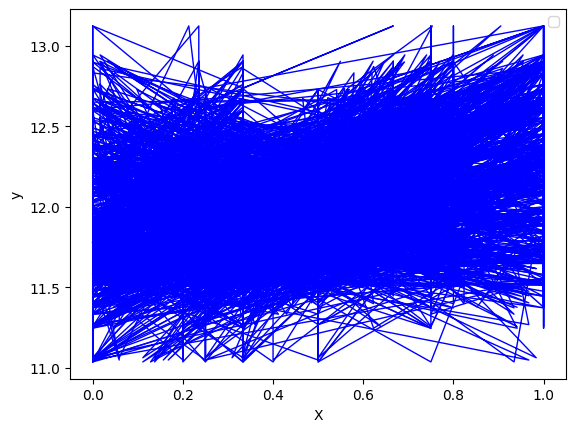

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
#plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Mean Squared Error: 0.18770284240303775


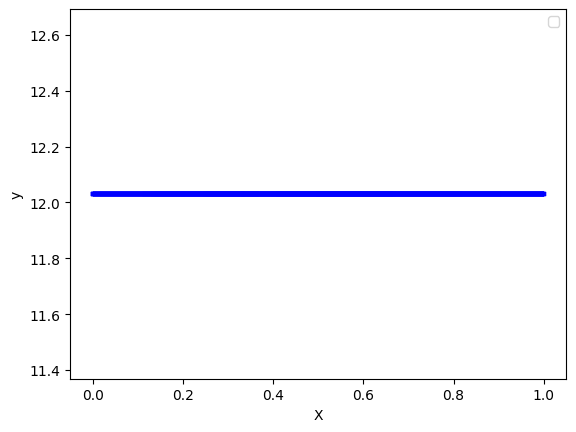

In [334]:
from sklearn.linear_model import Lasso

alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
#plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Mean Squared Error: 0.025031227139095343


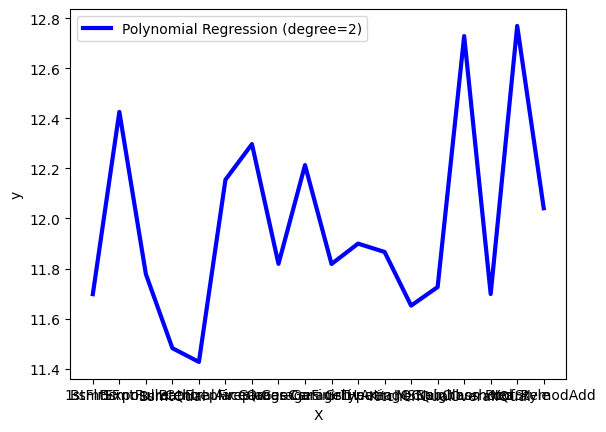

In [337]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sort the data for better visualization
X_sorted, y_sorted = zip(*sorted(zip(X_test, y_pred)))

# Plot the polynomial regression curve
#plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_sorted, y_sorted, color='blue', linewidth=3, label=f'Polynomial Regression (degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()